In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
# Load the data
training_data = pd.read_csv(r"C:\Users\youse\Desktop\ML PROJECT INDIA\train_data.csv")
testing_data = pd.read_csv(r"C:\Users\youse\Desktop\ML PROJECT INDIA\test_data.csv")

In [7]:
# EDA
print("Training Data Shape:", training_data.shape)
training_data.head()

Training Data Shape: (29165, 20)


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [9]:
print("Missing values in training data:")
print(training_data.isnull().sum())



Missing values in training data:
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [10]:
# Feature Engineering
training_data['Job title'].fillna('Unknown', inplace=True)

In [11]:
print("Missing values in training data:")
print(training_data.isnull().sum())



Missing values in training data:
ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64


In [12]:
print("Testing Data Shape:", testing_data.shape)
testing_data.head()


Testing Data Shape: (7292, 20)


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [13]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [14]:
print("Missing values in testing data:")
print(testing_data.isnull().sum())

Missing values in testing data:
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [15]:
# Feature Engineering
testing_data['Job title'].fillna('Unknown', inplace=True)

In [16]:
print("Missing values in testing data:")
print(testing_data.isnull().sum())

Missing values in testing data:
ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64


In [17]:
# Data Preprocessing
X_train = training_data.drop('Is high risk', axis=1)
y_train = training_data['Is high risk']
X_test = testing_data.drop('Is high risk', axis=1)
y_test = testing_data['Is high risk']

In [18]:
# One-hot encoding categorical columns
categorical_cols = ['Gender', 'Marital status', 'Employment status', 'Education level', 'Dwelling', 'Job title', 'Has a car', 'Has a property']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train.drop(columns=categorical_cols, inplace=True)
X_test.drop(columns=categorical_cols, inplace=True)

X_train_preprocessed = pd.concat([X_train, pd.DataFrame(X_train_encoded)], axis=1)
X_test_preprocessed = pd.concat([X_test, pd.DataFrame(X_test_encoded)], axis=1)

c:\Users\youse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
# Convert column names to strings
X_train_preprocessed.columns = X_train_preprocessed.columns.astype(str)
X_test_preprocessed.columns = X_test_preprocessed.columns.astype(str)

# Model Development
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9817608337904553

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.31      0.11      0.16       117

    accuracy                           0.98      7292
   macro avg       0.65      0.55      0.58      7292
weighted avg       0.97      0.98      0.98      7292



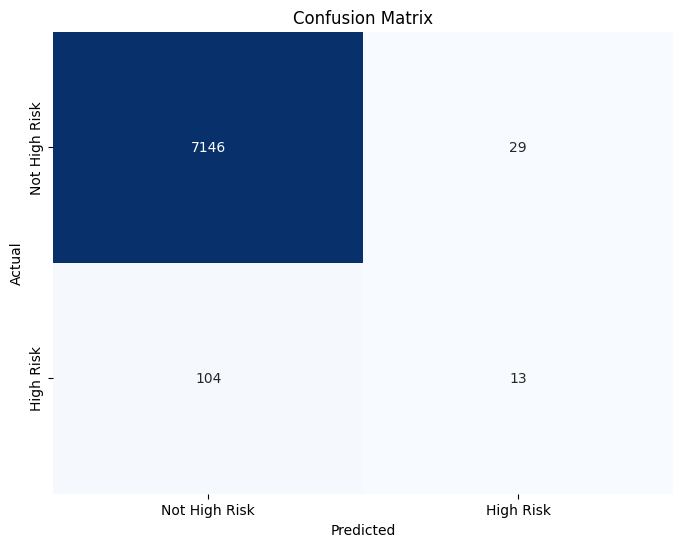

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not High Risk', 'High Risk'], 
            yticklabels=['Not High Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
 from sklearn.metrics import confusion_matrix
print("True Positive (TP): The model correctly predicted the positive class (in your case, approved credit card applications)")
print("False Positive (FP): The model incorrectly predicted the positive class when it was actually negative (i.e., it predicted approval when the application should have been rejected)")
print("True Negative (TN): The model correctly predicted the negative class (in your case, rejected credit card applications)")
print("False Negative (FN): The model incorrectly predicted the negative class when it was actually positive (i.e., it predicted rejection when the application should have been approved)")


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Print the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


True Positive (TP): The model correctly predicted the positive class (in your case, approved credit card applications)
False Positive (FP): The model incorrectly predicted the positive class when it was actually negative (i.e., it predicted approval when the application should have been rejected)
True Negative (TN): The model correctly predicted the negative class (in your case, rejected credit card applications)
False Negative (FN): The model incorrectly predicted the negative class when it was actually positive (i.e., it predicted rejection when the application should have been approved)
True Positives (TP): 13
False Positives (FP): 29
True Negatives (TN): 7146
False Negatives (FN): 104


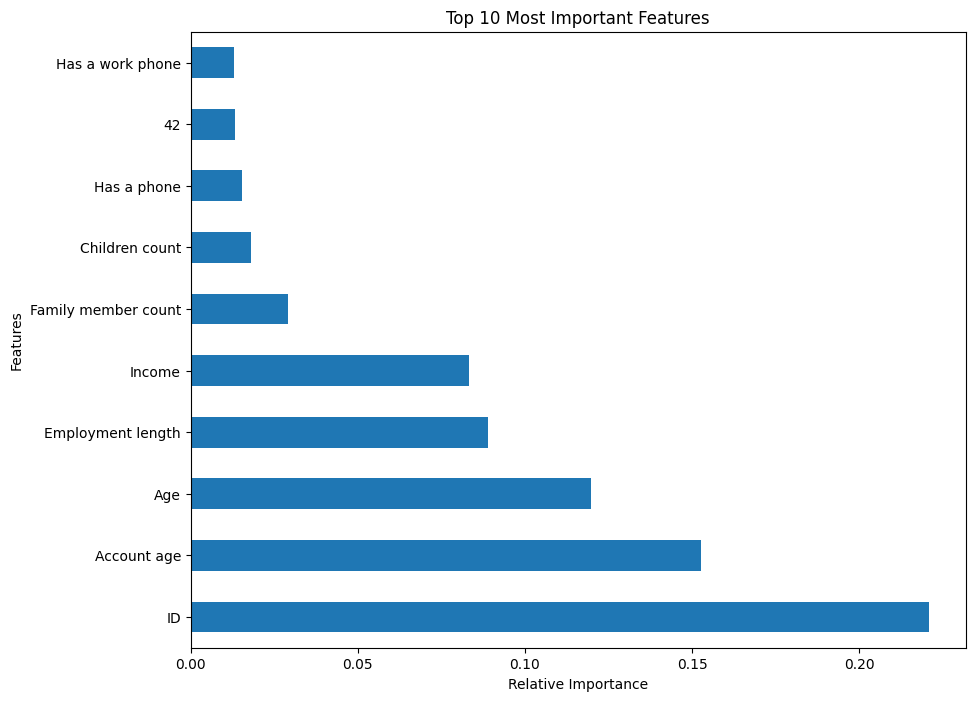

In [23]:
# Feature Importance Plot
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train_preprocessed.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.show()

In [24]:
# Recommendations
print("Recommendations:")
print("Based on the analysis, it's recommended to conduct further investigation into feature engineering to create new features or transform existing ones to potentially improve model performance.")
print("Additionally, experimenting with other classification algorithms such as logistic regression, decision trees, or boosting algorithms could help identify the best-performing model.")
print("Finally, actionable recommendations should be provided to stakeholders to aid in reducing risk and improving the credit card approval process.")

Recommendations:
Based on the analysis, it's recommended to conduct further investigation into feature engineering to create new features or transform existing ones to potentially improve model performance.
Additionally, experimenting with other classification algorithms such as logistic regression, decision trees, or boosting algorithms could help identify the best-performing model.
Finally, actionable recommendations should be provided to stakeholders to aid in reducing risk and improving the credit card approval process.
